### Содержание<a name="1"></a>

1. [Формат JSON](#2)
2. [Извлекаем данные из JSON](#3)
3. [Группировка данных](#4)
4. [Создание датафрейма на основе JSON-файла](#5)
5. [Создание JSON-файла](#6)
6. [Feature Engineering](#7)
7. [Поиск выбросов](#8)

[К содержанию](#1)

---

###  Формат JSON<a name="2"></a>

__Что такое JSON и зачем он нужен?__

Аббревиатура __JSON__ расшифровывается как __JavaScript Object Notation__ или, в вольном переводе, система __обозначения__ (или записи) объектов __JavaScript__.  

Несмотря на то,  что JSON является подмножеством языка программирования __JavaScript__, сейчас это общепризнанный формат обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с этим форматом.

__Важно!__ JSON — это простой, структурированный, основанный на использовании текста __формат обмена данными__.

Когда мы говорим об обмене данными, то чаще всего имеем в виду передачу данных по компьютерным сетям, например, пересылку данных от сервера к браузеру. Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести. Именно этим мы сейчас и займёмся.

__Инструменты для работы с JSON__

Для работы с данными в формате JSON в Python используется __библиотека__ json, которую необходимо будет загрузить в начале работы. Также нам может быть полезен __модуль pprint__ (именно так, с двумя "р" в начале) и встроенная в него функция pprint, с помощью которой можно красиво выводить на экран структурированные данные.

Итак, если в своем коде вы планируете работать с данными в JSON-формате, то необходимо включить в программу эти два импорта:

In [2]:
import json  
from pprint import pprint

__Как выглядит JSON?__

Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

* набор пар __"ключ-значение"__, причём ключ — это всегда строковая величина; в Python такая структура преобразуется в словарь;
* упорядоченный __набор значений__; при чтении JSON в Python эта структура будет преобразована в список.  

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

__Смотрим на данные__

Чтобы перевести данные из формата JSON в формат, который можно обрабатывать на Python, необходимо выполнить процедуру, которая называется __десериализация__ (иными словами, декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется __сериализация__.  

Для выполнения десериализации мы воспользуемся __методом load__ модуля json. В качестве параметра укажем ссылку на файл:

In [4]:
with open('recipes.json') as f:
    recipes = json.load(f)

Чтобы разобраться в структуре данных, давайте выведем их на экран с помощью __функции pprint__. Будьте готовы к тому, что данных в наборе много, поэтому в ячейке Out появится несколько сот строк. Нам не нужно будет просматривать все строки. Главное — понять общую структуру __объекта recipes__:

In [5]:
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

                  'sugar',
                  'baking powder',
                  'cumin seed',
                  'frozen peas']},
 {'cuisine': 'mexican',
  'id': 47427,
  'ingredients': ['pepper',
                  'pita bread rounds',
                  'red bell pepper',
                  'olive oil',
                  'garlic',
                  'tomatoes',
                  'eggplant',
                  'salt',
                  'lime',
                  'butter',
                  'chopped cilantro fresh']},
 {'cuisine': 'french',
  'id': 40064,
  'ingredients': ['pepper',
                  'grated GruyГЁre cheese',
                  'heavy cream',
                  'salt',
                  'potatoes']},
 {'cuisine': 'japanese',
  'id': 9010,
  'ingredients': ['fresh ginger',
                  'vegetable broth',
                  'sake',
                  'green onions',
                  'carrots',
                  'udon',
                  'red miso',
                  'silken t

 {'cuisine': 'moroccan',
  'id': 16712,
  'ingredients': ['ground cinnamon',
                  'lamb neck fillets',
                  'tomatoes',
                  'chopped parsley',
                  'paprika']},
 {'cuisine': 'italian',
  'id': 28250,
  'ingredients': ['eggplant',
                  'low sodium chicken broth',
                  'fresh basil leaves',
                  'pepper',
                  'grated parmesan cheese',
                  'goat cheese',
                  'zucchini',
                  'salt',
                  'polenta',
                  'water',
                  'bell pepper',
                  'olive oil cooking spray']},
 {'cuisine': 'indian',
  'id': 34209,
  'ingredients': ['sugar',
                  'water',
                  'cauliflower florets',
                  'chili sauce',
                  'sweet chili sauce',
                  'maida flour',
                  'salt',
                  'oil',
                  'soy sauce',
              

                  'salt',
                  'fish fillets',
                  'old bay seasoning',
                  'vegetable oil',
                  'beer']},
 {'cuisine': 'mexican',
  'id': 7530,
  'ingredients': ['seasoning',
                  'lime juice',
                  'green bell pepper, slice',
                  'lime wedges',
                  'salt',
                  'red bell pepper',
                  'sugar',
                  'garlic powder',
                  'chili powder',
                  'diced tomatoes',
                  'shredded cheese',
                  'onions',
                  'red chili powder',
                  'orange bell pepper',
                  'flour tortillas',
                  'shredded lettuce',
                  'salsa',
                  'sour cream',
                  'black pepper',
                  'beef',
                  'onion powder',
                  'paprika',
                  'corn starch',
                  'ground cumi

Итак, мы видим, что рецепт каждого блюда описан в виде словаря, состоящего из трёх пар "ключ-значение". Ключ __"cuisine"__ обозначает принадлежность блюда к определённой кухне, __"id"__ — это уникальный идентификационный номер блюда, а ключ __"ingredients"__ содержит перечень продуктов, входящих в состав блюда.

__Задания__

Рецепты скольких блюд содержатся в recipes?

In [6]:
len(recipes)

500

[К содержанию](#1)

---

###  Извлекаем данные из JSON<a name="3"></a>

__Извлекаем единичные данные__

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом, как с обычным __словарём__, или, как в случае с нашими данными, __списком__. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней __вложенности__. Тем не менее общие приёмы работы остаются стандартными.

Давайте выясним некоторые детали о блюде, которое записано первым в списке. Например, чтобы узнать ID этого блюда, мы можем использовать такой код:

In [7]:
recipes[0]['id']
>>> 10259

10259

В данном случае сначала мы извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать __ключ словаря__. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:

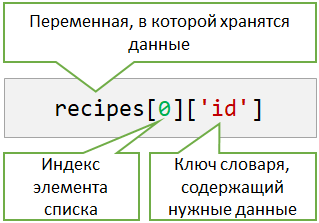

Для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на __'ingredients'__:

In [8]:
recipes[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

Ещё один пример касается извлечения информации о конкретном блюде. Давайте попробуем найти информацию о том, к какой кухне относится блюдо с id = 13121. Сложность задачи заключается в том, что все id хранятся в словарях, которые являются элементами списка. Для получения данных о нужном блюде нам придётся перебрать все элементы списка, проверить их id, и при обнаружении совпадения извлечь нужную информацию:

In [9]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] == 13121:  # если id текущего рецепта равен искомому
        print(recipe['cuisine'])  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено

thai


__Задания__

Какую кухню (ключ 'cuisine') представляет последнее блюдо в списке recipes?

In [10]:
recipes[-1]['cuisine']

'british'

Сколько ингредиентов входит в состав этого блюда?

In [11]:
len(recipes[-1]['ingredients'])

17

Какие из перечисленных ингредиентов присутствуют в блюде с id = 17636?

In [12]:
for recipe in recipes:
    if recipe['id'] == 17636:
        print(recipe['ingredients'])
        break

['tomato sauce', 'shredded carrots', 'spinach', 'part-skim mozzarella cheese', 'italian seasoning', 'english muffins, split and toasted', 'chopped onion', 'vegetable oil cooking spray', 'chopped green bell pepper']


Сколько ингредиентов входит в состав рецепта для приготовления блюда с id = 42013?

In [13]:
for recipe in recipes:
    if recipe['id'] == 42013:
        print(len(recipe['ingredients']))
        break 

14


Какие ингредиенты отсутствуют в блюде с id = 23629?

In [14]:
for recipe in recipes:
    if recipe['id'] == 23629:
        print(recipe['ingredients'])
        break

['eggs', 'russet potatoes', 'mexican chorizo', 'black beans', 'salsa', 'canola oil', 'colby cheese', 'black olives', 'sour cream', 'avocado', 'half & half', 'goat cheese']


[К содержанию](#1)

---

###  Группировка данных<a name="4"></a>

__Группируем данные__

К объектам JSON, в том числе после их десериализации, невозможно применить методы группировки, доступные при работе с __датафреймами Pandas__. Однако задачи по извлечению из JSON-файла обобщённой информации периодически возникают, и нам нужно понять, как их решать. Давайте рассмотрим всё на нескольких примерах.

__Кейс №1: Какое количество кухонь представлено в наборе данных?__

Итак, давайте попробуем проанализировать, кухни скольких народов мира присутствуют в нашем наборе данных. Напоминаем, что информация о типе кухни доступна по ключу __'cuisine'__.

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу 'cuisine' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список __recipes__, у нас не получится применить известный нам __метод unique()__ (этот метод не применим к словарям), и для извлечения всех уникальных значений нужно __перебирать__ элементы списка в цикле с параметром. Вот пример кода, с помощью которого это можно сделать:

In [15]:
cuisines = []  # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines):  # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines)

20

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а новой для вас __конструкции__ — множества (set). Множества содержат только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда добавить в множество такое же значение будет проигнорирована компьютером:

In [20]:
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines)

20

__Кейс №1: Задания__

Сколько ингредиентов включено в состав всех блюд, описанных в наборе данных?

In [24]:
ingredients = set()
for recipe in recipes:
    for ingredient in recipe['ingredients']:
        ingredients.add(ingredient)
len(ingredients)

1318

Сколько ингредиентов встречается в рецептах блюд итальянской кухни ('cuisine' = italian)?

In [23]:
italian_ingredients = set()
for recipe in recipes:
    if recipe['cuisine'] == 'italian':
        for ingredient in recipe['ingredients']:
            italian_ingredients.add(ingredient)
len(italian_ingredients)

406

Какие ингредиенты не встречаются в рецептах блюд русской кухни ('cuisine' = 'russian')?

In [25]:
russian_ingredients = set()
for recipe in recipes:
    if recipe['cuisine'] == 'russian':
        for ingredient in recipe['ingredients']:
            russian_ingredients.add(ingredient)
print(russian_ingredients)

{'red beets', 'buttermilk', 'dill', 'onions', 'cucumber', 'boiled eggs', 'mozzarella cheese', 'grits', 'sugar', 'salt', 'water'}


__Кейс №2: Оцениваем популярность ингредиентов__

Давайте представим, что мы хотим заняться торговлей продуктами для ресторанов национальной кухни. Нам необходимо оценить, какие продукты используются в приготовлении блюд чаще, а какие — реже. Давайте попробуем решить эту задачу с использованием имеющегося у нас набора данных.  

Эту задачу можно решить двумя способами:  

1. __Преобразовать__ JSON-структуру в __датафрейм__ и найти количество __ненулевых значений__ для каждого ингредиента. Этот способ мы подробнее рассмотрим в следующем шаге.
2. Создать __словарь__, в котором ключами будут являться названия ингредиентов, а значениями — количество рецептов, в которых встречается каждый ингредиент. Этот способ мы рассмотрим прямо сейчас.  

Для создания словаря нам понадобится список или множество, содержащие перечень всех ингредиентов из описанных в наборе данных рецептов. Такой список вы составили при решении задачи в предыдущем уроке. Воспользуйтесь вашим кодом для решения этой задачи ещё раз, но при этом назовите список (или множество, это не будет иметь значения в коде, который мы собираемся создавать) именем __ingredients__.

__План решения задачи:__

1. Для хранения информации о частоте встречаемости ингредиентов мы создадим пустой __словарь food.__
2. Заполним словарь food __ключами__, соответствующими названиями ингредиентов. В качестве значений по каждому ключу установим 0.
3. Организуем __вложенный цикл__, в котором будем перебирать рецепты (внешний цикл) и ингредиенты, использующиеся в каждом рецепте (внутренний цикл). При каждом появлении очередного ингредиента мы будем увеличивать значение соответствующего элемента словаря food на единицу.

Вот как будут выглядеть те же действия в виде __кода на Python__:

In [26]:
food = {}  # создаём пустой словарь для хранения информации об ингредиентах
for item in ingredients:  # перебираем список ингредиентов
    food[item] = 0 # добавляем в словарь ключ, соответствующий очередному ингредиенту
for recipe in recipes:   # перебираем список рецептов
    for item in recipe['ingredients']:   # и список ингредиентов в каждом рецепте
        food[item] += 1   # увеличиваем значение нужного ключа в словаре на 1

Теперь мы можем обращаться к словарю food по ключам и получать информацию о количестве рецептов, включающих тот или иной ингредиент:

In [27]:
food['sugar']

81

In [28]:
food['eggs']

43

__Кейс №2: Задания__

Какие ингредиенты входят в состав более чем 20% блюд, представленных в наборе данных?

In [29]:
for index, value in food.items():
    if value > 100:
        print(index, value)

salt 217
garlic 107


Сколько ингредиентов входит в состав только одного блюда?

In [31]:
one_ingredients = []
for index, value in food.items():
    if value == 1:
        one_ingredients.append(index)
len(one_ingredients)

684

[К содержанию](#1)

---

###  Создание датафрейма на основе JSON-файла<a name="5"></a>

__Pandas + JSON = ...__

В предыдущих блоках нам удавалось извлекать из набора данных единичные показатели, но для полноценного анализа данных этого часто бывает недостаточно. Для решения многих задач нужна возможность работать с данными в форме __таблицы__ и обозревать всю таблицу целиком. Например, набор данных, с фрагментом которого мы работаем в этом разделе модуля,  —  это материал для задачи по машинному обучению, определяющий по набору ингредиентов  тип кухни, к которой относится рецепт. Для решения этой и подобных задач необходимо перевести данные и в табличную форму и удобнее всего  использовать __библиотеку Pandas__.  

Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". Поскольку структура всех вложенных словарей одинакова, мы можем создать датафрейм на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [32]:
import pandas as pd
df = pd.DataFrame(recipes)

В результате мы действительно получаем датафрейм, однако его структура не позволит нам осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд:

In [33]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном __столбце__. Созданием именно такой таблицы мы займёмся на следующем шаге.

__Готовим данные для анализа__

Давайте создадим на основе данных из JSON-файла __датафрейм__, пригодный для __автоматизированного анализа__ данных. В качестве основы мы будем использовать датафрейм, созданный на предыдущем этапе.  

Прежде всего разберёмся со __структурой__ нового датафрейма. В финальной версии в нашем датафрейме должны будут остаться столбцы, содержащие id блюда и название кухни; вместо списка ингредиентов мы включим в датафрейм столбец с данными о количестве ингредиентов, а оставшаяся часть датафрейма будет представлена столбцами, названия которых будут соответствовать названиям разных ингредиентов, а значения будут равны 1, если ингредиент присутствует в блюде, и 0,  если — отсутствует.  

Общий вид датафрейма должен быть приблизительно следующим (возможен другой порядок столбцов с ингредиентами):

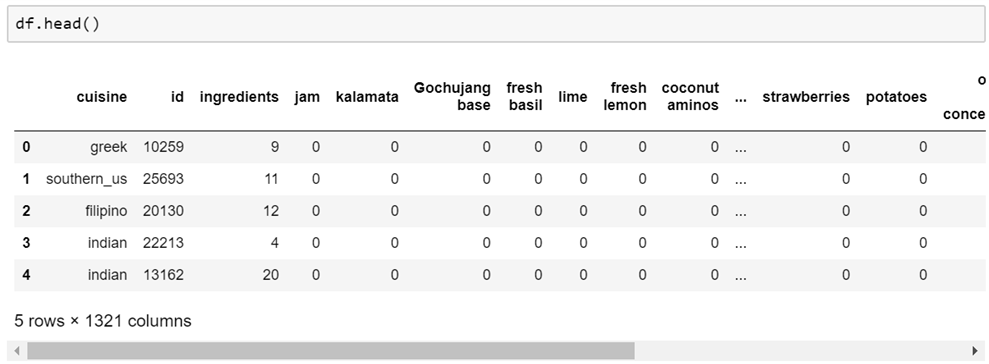

Работу над созданием датафрейма мы начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения  будем проводить в __два этапа__:  

1. Создадим __функцию__ для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце 'ingredients' для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.
2. Организуем __цикл__ с параметром, в котором будем перебирать наименования всех ингредиентов. Для каждого ингредиента создадим в датафрейме столбец с соответствующим названием и заполним его единичками и нулями, применив к датафрейму, а точнее, к столбцу 'ingredients', функцию, созданную нами на предыдущем шаге.  

Код функции, с помощью которой мы будем создавать новые столбцы и заполнять их значениями, могут выглядеть следующим образом:

In [34]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

Теперь перейдём к созданию кода, в котором будут создаваться столбцы с информацией о наличии или отсутствии того или иного ингредиента в конкретном рецепте:

In [35]:
for item in ingredients:
    df[item] = df['ingredients'].apply(find_item)

В завершение изменим значение столбца ingredients, заполнив его данными о количестве ингредиентов в каждом рецепте:

In [36]:
df['ingredients'] = df['ingredients'].apply(len)

__Сохраняем датафрейм в CSV-файле__

В случае, если вы планируете продолжать работать с датафреймом, созданным на основе данных, полученных в JSON-формате, полезно будет научиться сохранять созданный датафрейм в виде __CSV-файла__. Для выполнения этой операции в Pandas существует __метод__ `to_csv`:

In [37]:
df.to_csv('recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, под которым нужно сохранить данные. Также мы установили значение параметра __index__ равным False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца и в результате не загружать лишних данных при открытии файла __методом read_csv__.

[К содержанию](#1)

---

###  Создание JSON-файла<a name="6"></a>

__Из Pandas в JSON__

В завершающей части этого блока мы решим обратную задачу и создадим __JSON-файл__ из CSV-файла, который получили в конце предыдущего этапа. Итак, давайте начнём с чтения файла и создания датафрейма на его основе:

In [38]:
df = pd.read_csv('recipes.csv')

Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Как вы помните,  после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов.

Поскольку по условию мы не можем пользоваться предыдущими наработками, давайте начнём с создания __списка__, содержащего перечень ингредиентов, встречающихся в рецептах, а также списка, содержащего перечень __id__ всех блюд. Эти списки в дальнейшем мы будем использовать для заполнения __JSON-структуры__.

__Задания__

Напишите код для создания списка id всех блюд, представленных в датафрейме.

In [39]:
ids = list(df['id'])

Напишите код для создания списка ингредиентов всех блюд, представленных в датафрейме.

In [43]:
ingredients = list(df.drop(columns=['id','cuisine','ingredients']).columns)

__Сохранение итоговой структуры:__

Разберём основную часть кода (пока без дополнительной функции). Как вы помните, после десериализации JSON-файла мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "ключ-значение", при этом в качестве значений выступали целое число (id), строковая величина (тип кухни) и список строковых величин (перечень ингредиентов). Сейчас нам предстоит воссоздать эту __структуру__, извлекая данные из датафрейма.

Для хранения итоговой структуры создадим пустой список __new_recipes__. Также создадим списки для хранения id всех блюд и названий всех ингредиентов с помощью кода из предыдущих упражнений:

In [45]:
new_recipes = []
ids = list(df['id'])
ingredients = list(df.drop(columns=['id','cuisine','ingredients']).columns)

__Стратегия действий:__

1. Организуем цикл с параметром, в котором будем перебирать элементы списка ids. В результате в процессе прохождения цикла параметр постепенно примет значение id каждого блюда.  

2. На каждом шаге цикла создадим словарь, содержащий три пары "ключ-значение". Ключу "id" мы присвоим значение параметра цикла, ключу "cuisine" — значение соответствующей кухни, которое мы получим, применив фильтр по id к датафрейму df.  

3. Для заполнения значения (списка) по ключу "ingredients" воспользуемся функцией, код которой обсудим чуть позже. Каждый созданный словарь мы будем добавлять к __списку new_recipes:__

In [52]:
for current_id in ids:
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0]
    current_ingredients = make_list(df[df['id'] == current_id])
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients}
    new_recipes.append(current_recipe)

__Задания__

Напишите код функции make_list, которая принимает строку датафрейма df, содержащую данные об одном рецепте, и возвращает перечень ингредиентов этого блюда в виде списка.

In [51]:
def make_list(df):
    ingredients_list = []
    for ingredient in ingredients:
        if df[ingredient].values[0] == 1:
            ingredients_list.append(ingredient)
    return ingredients_list

В завершающей части данного блока мы выполним сериализацию списка new_recipes и запишем полученные данные в файл. Для сериализации мы будем использовать функцию dumps(), которой в качестве параметра передадим список new_recipes. Запись в файл осуществляется с помощью метода write(). Предварительно файл нужно будет открыть для записи с помощью функции open и параметра 'w':

In [53]:
new_recipes = json.dumps(new_recipes)
with open("new_recipes.json", "w") as write_file:
    write_file.write(new_recipes)

Оба действия можно совместить, если использовать метод dump():

In [54]:
with open("new_recipes.json", "w") as write_file:
    json.dump(new_recipes, write_file)

[К содержанию](#1)

---

###  Формат XLS (Excel)<a name="7"></a>

__Что такое Excel и зачем он нужен?__

__Excel-файлы__ — это по-простому таблицы с данными, которые имеют формат __.xls__ и __.xlsx.__ У вас уже есть опыт работы с форматом данных .csv, но этот формат проще Excel. Файл формата .csv это текстовый файл, в котором данные перечислены через запятую, но могут быть разделены и другими символами.

Файл формата __.csv__ можно открыть любым текстовым редактором, с __Excel__ иначе: он хранит не только табличные данные, но и может содержать изображения, графики, формулы, форматирование. Например, вы можете сделать столбец с температурой за окном за прошедшие 100 дней. Над столбцом можно записать «Температура» и выделить это слово __красным цветом__, написать его _курсивом_, рядом можно записать функцию, которая посчитает среднюю температуру, и построить график с изменением температуры.

Скорее всего, вы уже работали с этим форматом данных, используя инструменты, которые мы рассмотрим ниже. В этом блоке мы будем применять __Python__, чтобы извлекать данные из __Excel-файлов__ и записывать туда данные.

__Инструменты для работы с Excel__

Сейчас практически любой текстовый процессор может работать с __Excel-файлами__. Изначально мы работали с __.xls__ файлами с помощью __Microsoft Excel__. Позже, начиная с версии __Microsoft Excel 2007__, появился более продвинутый формат __.xlsx.__ Для нашей работы разницы между ними нет, это те же самые табличные документы.  

Инструменты для работы с Excel:  

1. __Microsoft Excel__.
2. __Google Sheets:__ редактирование файлов онлайн, создать новый документ можно с помощью sheets.new.
3. __OpenOffice__ — открытый набор инструментов, в который входит приложение __Calc__, портирован на многие платформы.
4. __Pandas:__ немного непривычно, но можно работать.

В данном блоке мы будем работать именно с __Pandas__: научимся читать и изменять Excel-файлы. Преимущество этого инструмента в том, что он позволяет работать со множеством однотипных документов и автоматизировать обработку. Pandas подходит для тех, кто умеет программировать, но если вы не умеете, то можно автоматизировать работу с табличными данными с помощью Zapier и IFTTT.

__Чтение Excel-файла__

Для начала поработаем с файлом Fig3-1.xls. В Pandas есть метод, с помощью которого можно прочитать файл:

In [55]:
data = pd.read_excel('Fig3-1.xls')

В данном случае будет считан только первый лист файла содержащий табличные данные (как считать все листы содержащие табличные данные в файле будет рассмотрено ниже).  

В этот метод можно передать параметр __header=None__, чтобы не считать первую строчку за названия столбцов. Посмотрим, что будет, если передать такой параметр и открыть данные:

In [57]:
data = pd.read_excel('Fig3-1.xls', header=None)  
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,"U.S. Home Price and Related data, for Figure 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,See the book for description of data.,NaN,NaN,NaN,"Update Nominal Home Price Index, Click Additio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Monthly data from January 1953 for prices, all...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nominal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Real,NaN,Real,NaN,NaN,NaN,NaN,Home,NaN,NaN,Nominal,NaN,NaN,Consumer,NaN,NaN,NaN,NaN
4,NaN,Home,NaN,Building,U.S.,NaN,NaN,NaN,Price,HPI,NaN,Building,NaN,NaN,Price,CPI Annual&,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2018.791667,174.056034,NaN,NaN,NaN,NaN,NaN,2018.791667,205.709,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2018.791667,252.885,BLS,NaN,NaN,NaN
860,2018.875,174.438912,NaN,NaN,NaN,NaN,NaN,2018.875,205.471,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2018.875,252.038,BLS,NaN,NaN,NaN
861,2018.958333,174.658876,NaN,NaN,NaN,NaN,NaN,2018.958333,205.073,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2018.958333,251.233,BLS,NaN,NaN,NaN
862,2019.041667,174.01623,NaN,NaN,NaN,NaN,NaN,2019.041667,204.708,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2019.041667,251.712,BLS,NaN,NaN,NaN


Мы видим, что файл загрузился и выглядит, как обычный __pandas.DataFrame__. Pandas автоматически обрабатывает данные в этом формате при загрузке. При этом получается много пропусков (NaN), это те места, где в ячейках ничего не было написано. Посмотрим, как этот лист выглядит, если посмотреть на него стандартными средствами (не через Pandas):

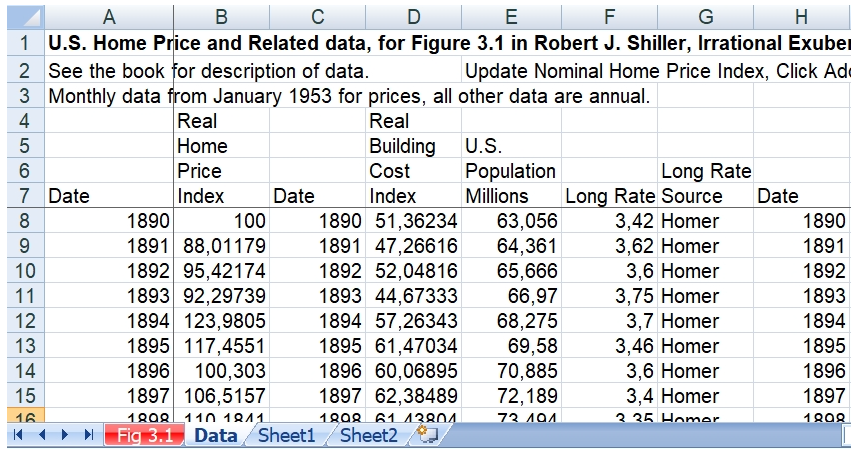

При загрузке потерялось __форматирование__ (жирные символы): Pandas не умеет работать с данными, содержащими форматирование. Но при сохранении файла после обработки мы сможем добавить форматирование. Если Pandas отображает не все столбцы при выводе данных, вы можете воспользоваться следующим методом, чтобы выводить все столбцы:

In [58]:
pd.set_option('display.max_columns', None)  

Это просто небольшая настройка Pandas.  Вы можете применить её сразу после импортирования библиотеки, и её действие будет распространяться на весь код.

__Основные параметры при чтении__

Параметры, которые можно передавать методу __pandas.read_excel()__:

1. __io__ — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете или специальный объект __ExcelFile__, о котором мы поговорим позже.
2. __sheet_name__ — ссылка на лист в Excel-файле. Возможные варианты значения данного параметра:
 * __0__ — значение по умолчанию, означает, что загружаем первую страницу (первый лист);
 * __'Sheet1'__ — можно передать название листа; обычно страницы называются 'SheetX', где X — номер листа, но могут использоваться и другие названия; 
 * __[0, 1, 'Sheet3']__ — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде __DataFrame__;
 * __None__ — если передать такое значение, то Pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте.
3. __na_values__ — список значений, которые будут считаться пропусками. Здесь всё точно так же, как при чтении .csv файла: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’

In [59]:
data.shape[0]

864

__Чтение с помощью ExcelFile__

Еще один способ прочитать Excel-файл — использовать __pd.ExcelFile__. Это специальный объект, которому на вход можно передать путь к файлу. Сначала мы создаем объект ExcelFile и передаём ему путь к файлу, после этого можем работать с файлом, считывая содержимое.

In [62]:
data_file = pd.ExcelFile('./Fig3-1.xls')  
data = pd.read_excel(data_file, header=None)

Когда это может пригодиться? Например, если мы принимаем файл в одном месте программы, а используем в другом. Это может оптимизировать затрачиваемое время, если мы не знаем заранее, когда будем использовать содержимое файла. Ещё один случай:   в файле есть несколько страниц и нам не нужны все эти страницы сразу. Если мы будем читать страницы порознь с помощью __read_excel__ и передавать в этот метод путь к файлу, мы будем каждый раз загружать этот файл в память. Когда данных много, это заполнит вашу оперативную память. В случае с ExcelFile мы прочитаем файл один раз и потом будем только подгружать необходимые страницы.

С ExcelFile можно работать с помощью контекстного менеджера:

>with pd.ExcelFile('Fig3-1.xls') as xls:  
    data['Sheet1'] = pd.read_excel(xls, 'Sheet1', na_values=['NA'])  
    data['Sheet2'] = pd.read_excel(xls, 'Sheet2')

Если на первой странице мы хотим считать пропусками только ячейки со значением 'NA', а на второй  – любые похожие на пропуски значения (они описаны выше), то ExcelFile позволит проявить такую гибкость при чтении данных с разных листов.

Если мы просто хотим прочитать два листа из Excel-файла, то этот код:

>with pd.ExcelFile('Fig3-1.xls') as xls:  
    data['Sheet1'] = pd.read_excel(xls, 'Sheet1')  
    data['Sheet2'] = pd.read_excel(xls, 'Sheet2')

И этот код:

In [65]:
data = pd.read_excel('Fig3-1.xls', ['Sheet1', 'Sheet2'])

Оба кода дадут нам одинаковый результат как по скорости работы, так и по возвращаемому результату.

__Продвинутое чтение Excel-файла__

Рассмотрим ещё один способ, с помощью которого можно __прочитать данные__. В прошлой секции вы скачали данные, которые мы специально загрузили на учебный портал. На самом деле ни вам, ни нам не обязательно было сохранять эти данные к себе на компьютер: ссылку на данные можно было передать прямо в __метод read_excel__:

In [66]:
data = pd.read_excel('http://www.econ.yale.edu/~shiller/data/Fig3-1.xls', header=None)

Если вы выполните этот код, результат будет точно такой же, как раньше. Подобный подход можно использовать и при работе с __ExcelFile__. Зачем это может пригодиться? Например, у вас на сервере есть скрипт, который генерирует отчеты в формате Excel и возвращает вам ссылки на них. Можно сохранять данные на диск, затем читать их в Pandas. А можно сразу прочитать их по ссылке, сэкономив немного времени, строчек кода и, возможно, места на диске.

До этого вы работали с данными, в которых находились обычные таблицы. __Что вы делали?__ Загружали эти таблицы и дальше работали с ними. Однако часто приходится работать с таблицами, не имеющими настолько чёткой структуры или содержащих много дополнительной, значимой для нас информации: номер документа, дата его подписания, фамилия сотрудника, чья подпись стоит на документе. 

Давайте рассмотрим подходы к решению таких задач на примере.

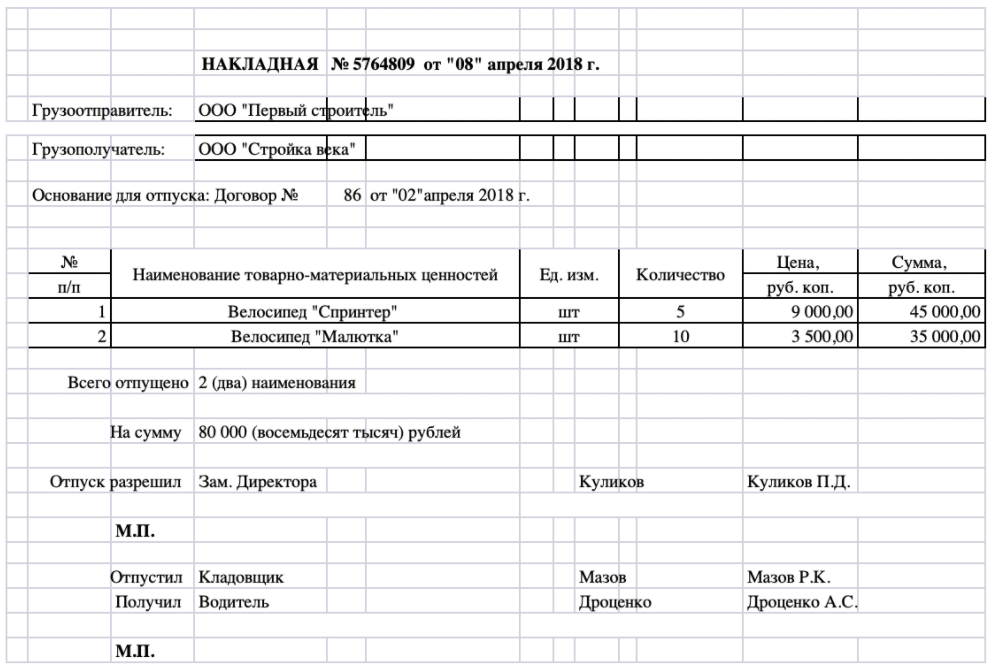

__Что нам может понадобиться в этих данных?__ Во-первых, это названия компаний, имена людей, номер и дата накладной. Во-вторых, табличные данные в центре файла — информация об объектах, которые были куплены.

Если мы посмотрим на то, как выглядит файл, то увидим, что первые две строчки — __пустые__, и при чтении файла их желательно пропустить. Для этого можно передать в __функцию read_excel__ дополнительный параметр — __skiprows__. В качестве значения параметра укажем __количество строк__, которые надо пропустить при чтении:

__Задания__

Сколько строк нужно пропустить в начале, чтобы в первой строке получить номер и дату накладной?

In [80]:
data = pd.read_excel("./nakladnaya.xls", header=None, skiprows=2)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,НАКЛАДНАЯ,"№ 5764809 от ""08"" апреля 2018 г.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Грузоотправитель:,NaN,"ООО ""Первый строитель""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Грузополучатель:,NaN,"ООО ""Стройка века""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можно заметить, что многие строки датафрейма data полностью состоят из пропусков. Используйте изученный ранее метод pandas, чтобы убрать все такие строки. Запишите ниже, сколько строк осталось.

In [82]:
data = data.dropna(how='all', axis=0)

In [75]:
data.shape[0]

15

Теперь начинается ручная работа. Предобработка данных занимает до 80% работы, часто приходится пристально изучать данные и искать способы __автоматизировать__ процесс в надежде, что формат данных внезапно не поменяется.

С таблицами можно работать, как с __текстовыми данными__, и использовать алгоритмы машинного обучения, чтобы автоматически определять, как поменялся формат данных и автоматически перестраивать правила извлечения данных. Тем не менее, в этом модуле мы не используем машинное обучение, поэтому извлечём данные вручную.

Какой код поможет узнать номер накладной?

In [78]:
data.iloc[0, 4][2:9]

'5764809'

Выберите те варианты, которые позволят нам выделить таблицу товаров из датафрейма data, сразу после чтения из файла и удаления строк полностью состоящих из пропусков. Заголовок таблицы товаров нам тоже не нужен.

In [83]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,НАКЛАДНАЯ,"№ 5764809 от ""08"" апреля 2018 г.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Грузоотправитель:,NaN,"ООО ""Первый строитель""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Грузополучатель:,NaN,"ООО ""Стройка века""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Основание для отпуска: Договор №,NaN,NaN,86,"от ""02""апреля 2018 г.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,№,Наименование товарно-материальных ценностей,NaN,NaN,NaN,Ед. изм.,NaN,NaN,Количество,NaN,"Цена,","Сумма,"
10,NaN,п/п,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,руб. коп.,руб. коп.
11,NaN,1,"Велосипед ""Спринтер""",NaN,NaN,NaN,шт,NaN,NaN,5,NaN,9000,45000
12,NaN,2,"Велосипед ""Малютка""",NaN,NaN,NaN,шт,NaN,NaN,10,NaN,3500,35000
14,NaN,NaN,Всего отпущено,2 (два) наименования,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,На сумму,80 000 (восемьдесят тысяч) рублей,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data.iloc[6:8, :].dropna(axis=1, how='all')

,1,2,6,9,11,12
11,1,"Велосипед ""Спринтер""",шт,5,9000,45000
12,2,"Велосипед ""Малютка""",шт,10,3500,35000


In [85]:
data.iloc[6:8, [1, 2, 6, 9, 11, 12]]

,1,2,6,9,11,12
11,1,"Велосипед ""Спринтер""",шт,5,9000,45000
12,2,"Велосипед ""Малютка""",шт,10,3500,35000


In [87]:
data.iloc[6:8, :].dropna(axis=1, how='any')

,1,2,6,9,11,12
11,1,"Велосипед ""Спринтер""",шт,5,9000,45000
12,2,"Велосипед ""Малютка""",шт,10,3500,35000


__Запись в Excel-файл__

Мы смогли получить __таблицу__, содержащую данные о товарах (велосипедах). Запишите ее в __объект table__. Теперь посмотрим, как мы можем записать ее обратно в чистый __Excel файл__.

In [88]:
table = data.iloc[6:8, :].dropna(axis=1, how='all')

Вспомним, что мы делали бы в случае .csv:

In [89]:
table.to_csv("table.csv")

Как сохранить эту таблицу в Excel файл:

In [90]:
table.to_excel("table.xls")

<ipython-input-90-35307b5e9c08>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  table.to_excel("table.xls")


Если мы сохраним таблицу именно так, мы сохраним ее индекс, и в данных будет находиться __лишний столбец__. Чтобы не сохранять индекс, можно в __метод to_excel()__ передать __параметр index=False__.

Ранее вы познакомились с еще одним способом прочитать __Excel файл__ с помощью __ExcelFile__. Теперь вы увидите схожий инструмент для записи — __ExcelWriter__. Вот как записать данные в файл с его помощью:

In [102]:
writer = pd.ExcelWriter('test.xlsx')  
table.to_excel(writer, index=False, sheet_name='Таблица')  
writer.save()  

Что здесь произошло?  

Во-первых, мы все равно использовали __метод to_excel()__, но вместо пути к будущему файлу передали объект типа __ExcelWriter__, который создали на первой строке. Во-вторых, мы вызвали __метод save()__ у объекта __ExcelWriter__. До этого момента сохранение не было завершено, и мы могли сделать еще некоторые действия. Какие? Давайте узнаем.

__Добавим форматирование__

Как мы узнали в самом начале, __Excel-файлы__ поддерживают __форматирование__ текста. С помощью __pandas__ мы можем добавлять форматирование в __Excel-файлы__, используя __ExcelWriter__. Если мы хотим добавить форматирование, нужно выбрать __объект workbook__, с помощью которого мы будем добавлять, например, выделение текста жирным. Кроме этого, нужно выбрать нужную страницу:

In [103]:
workbook = writer.book  
worksheet = writer.sheets['Таблица']

Теперь давайте выделим цену и сумму жирным, а наименование — красным цветом:

In [104]:
money_fmt = workbook.add_format({'bold': True})  
name_fmt = workbook.add_format({'color': 'red'})  
  
worksheet.set_column('E:F', 20, money_fmt)  
worksheet.set_column(1, 1, 20, name_fmt) 

0

Что здесь произошло?

1. Мы создали два объекта с описанием двух типов форматирования:

 * для оформления цены и стоимости — полужирное начертание;
 * для оформления наименований товаров — красный цвет текста.  

2. Связали описанные типы форматирования с определёнными ячейками листа __"Таблица"__: 

 * для столбцов E-F выбрали форматирование __money_fmt__ (применяется для оформления цены и стоимости); 
 * для столбца 1, который отвечает за наименование, выбрали форматирование __name_fmt__.

Для выбора нужных столбцов при задании параметров форматирования мы использовали два способа. Один из них — с помощью __буквенных обозначений__. Это стандартный способ обращаться к столбцам в __Excel__. Второй — с помощью __номера столбца__.  

Важно запомнить, что при работе с __Excel__ при задании __диапазона__ значений значения указываются включительно. Именно поэтому мы выбрали во втором случае применение форматирования от столбца 1 до столбца 1.  

Ещё одна вещь, на которую нужно обратить внимание: число 20 среди параметров метода __set_column()__. Этот параметр означает ширину столбца. Например, если мы передадим число 300, столбец получится очень широким, вы можете убедиться в этом сами.

Какие еще параметры можно попробовать:

* __border__ отвечает за границы столбца и может быть равен __True__ или __False__; 
* __align__ отвечает за расположение данных внутри ячеек, например, __center__ для настройки выравнивания по центру; 
* __fg_color__ отвечает за цвет фона, например, __'green'__, хотя можно передать и шестнадцатеричное значение, например, __'#D7E4BC'__.

Для того, чтобы исполнить код, нужно изменить __engine__ для __ExcelWriter__:

In [105]:
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')

[К содержанию](#1)

---